# CE9010 Introduction To Data Analysis

## Group 3

Student Name  |  Matric No  
:-:|:-:
Say Yueyang, Symus|U1922016K   
He Zeqing|U1722721G
Kwek Yan Qing|U1740743J   

---

# Background

Haze is one major form of air pollution that Singaporeans face annually. The presence of haze is attributed to the forest fires in Sumatra, Indonesia. Due to the increase in demand of commercial crops, Indonesian farmers have resorted to shifting agriculture, which includes the large-scale slash-and-burn of forest land to produce fertile planting grounds. The resulting air pollution is then spread across the region by the climatic phenomenon El Nino, enveloping Singapore in a blanket of haze and affecting the overall health of Singaporeans. In 2020, Indonesia fires torched approximately 207,000 hectares of forests from January to September. While the area is smaller compared to previous years, the burning resulted in a US$5.2 billion cost towards the Indonesian economy, and the occurrence of toxic smog over the city.

**References:**
- [Haze Pollution](https://eresources.nlb.gov.sg/infopedia/articles/SIP_2013-08-30_185150.html#:~:text=Forest%20fires%20in%20Sumatra%2C%20Indonesia,of%20the%20haze%20in%20Singapore.&text=Strong%20winds%20during%20the%20southwest,such%20fires%20throughout%20Southeast%20Asia.)
- [Commentary: Little smoke this haze season – but fires rage on in Indonesia](https://www.channelnewsasia.com/news/commentary/indonesia-forest-fire-peat-haze-palm-oil-jokowi-omnibus-bill-13533700)

# Objective

The objective of our study is to predict the possible intensity of future hotspots in South East Asia, including Indonesia.
Hopefully, this study will be able to support further research in estimating the possibility and severity of the occurrences of haze in Singapore.

Our study will be conducted with the relevant data on forest fires in South East Asia. Our dataset is obtained from the National Aeronautics and Space Administration (NASA)'s Fire Information for Resource Management System (FIRMS). It contains both geographical and technical data extracted from the Visible Infrared Imaging Radiometer Suite (VIIRS) sensor aboard their NOAA-20 weather satellite.

The table below describes each data available in our dataset:

| Data | Description |
| -: | :- |
| latitude | Indicates the latitude of fire pixel. |
| longitude	| Indicates the longitude of fire pixel. |
| bright_ti4 | Indicates the VIIRS I-4 Channel brightness temperature of the fire pixel. |
| scan | Indicates the  Along Scan pixel size. |
| track	| Indicates the Along Track pixel size.  |
| acq_date | Indicates the date of the acquired data. |
| acq_time | Indicates the time of the acquired data. |
| satellite | Indicates if the scan was done by the satellite (boolean values). |
| confidence | Indicates the confidence level of the data collected. |
| version | Indicates the version and source of data processing. |
| bright_ti5 | Indicates the VIIRS I-5 Channel brightness temperature of the fire pixel. |
| frp | Indicates the Fire Radiative Power (Detected thermal strength of the fire). |
| daynight | Indicates whether if it's daytime fire or nighttime fire. |

**References:**
- [Fire Information for Resource Management System](https://firms2.modaps.eosdis.nasa.gov/)
- [Visible Infrared Imaging Radiometer Suite](https://en.wikipedia.org/wiki/Visible_Infrared_Imaging_Radiometer_Suite)
- [Attribute Fields](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/v1-vnp14imgt#ed-viirs-375m-attributes)

---

# Table of Contents

1. [Setup](#1-|-Setup)
2. [Dataset Summaries](#2-|-Dataset-Summaries)
3. [Exploratory Data Analysis](#3-|-Exploratory-Data-Analysis)
4. [Data Pre-Preprocessing](#4-|-Data-Pre-Processing)
5. [Data Analysis](#5-|-Data-Analysis)
6. [Results Analysis](#6-|-Results-Analysis)

# 1 | Setup 

Sorry I'm using google colab so I'll just put the google colab stuff in this section. Delete later.

In [ ]:
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive/"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

%pwd #check that it is correctly mounted
%ls #list all the directories available

#Set github repo path
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join 
# path to your project on Google Drive

try: MY_GOOGLE_DRIVE_PATH
except NameError: 
  print("Warning: MY_GOOGLE_DRIVE_PATH is not defined, setting default path")
  MY_GOOGLE_DRIVE_PATH = "/content/drive/MyDrive/rootCE9010/repo" 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

!cd {PROJECT_PATH}

/content/drive/
Mounted at /content/drive/
content/  drive/  sample_data/
PROJECT_PATH:  /content/drive/MyDrive/rootCE9010/repo


In [ ]:
# Install required conda packages in the current Jupyter kernel
# for use on google colab, since it doesn't recognize conda packages
import sys
!pip install numpy
!pip install seaborn
!pip install plotly
!pip install pandas
!pip install geopandas
!pip install rtree
!pip install pygeos
!pip install imageio
!pip3 install rtree

In [ ]:
%cd {PROJECT_PATH}
%ls

/content/drive/MyDrive/rootCE9010/repo
'CE9010 Project Presentation.pptx'     'Ideas for Project.gdoc'
 content/                               Project.ipynb
 DataViz.ipynb                          README.md
 environment.yml                        Template.ipynb
 group3_notebook_CE9010_2021_v1.ipynb   testnotebook.ipynb


1. Ensure that the environment.yml file accompanying this notebook is located in the same directory as the notebook. <br><br>
2. Open Anaconda Prompt, and in Anaconda Prompt, navigate to the directory where the notebook was downloaded. <br>
3. In Anaconda Prompt, enter the following line of code:
> conda env create -f environment.yml

4. In Anaconda Prompt, enter the following line of code:
> conda info --envs

If installation of the environment is successful, you will see the environment 'CE9010_2021_Group3' listed in the list of environments.

5. Activate the notebook: 
> conda activate CE9010_2021_Group3

6. Run Jupyter Notebook 
> jupyter notebook

In [ ]:
#import sys
#!conda install --yes --prefix {sys.prefix} numpy
#!conda install --yes --prefix {sys.prefix} seaborn
#!conda install --yes --prefix {sys.prefix} plotly
#!conda install --yes --prefix {sys.prefix} pandas

In [ ]:
# Import required modules
import os
try:
    import pandas as pd
    import plotly.express as px
    from matplotlib import pyplot as plt
    from IPython.display import IFrame,Image
    import seaborn as sns
    import numpy as np
    import imageio
    import geopandas as gpd
    import rtree
    import pygeos
    print ("All modules imported successfully.")
except ImportError:
    print ("One or more modules not imported!")
    print ("Please check that all dependencies are installed.")

# Directory to store local content for loading of interactive images
if not os.path.exists("content"):
    os.mkdir("content")
# Clean up past images
else:
    for f in os.listdir('./content'):
        os.remove(os.path.join('content', f))

All modules imported successfully.


# 2 | Dataset Summaries 

In [ ]:
# Data Acquisition
# Import data from the Active Fire Dataset, VIIRS 375m / NOAA-20
data = pd.read_csv("https://firms2.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/csv/J1_VIIRS_C2_SouthEast_Asia_7d.csv",sep=',')
print (data.shape) # dimensions
data[:5]

(39475, 13)


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,-9.49672,160.28886,341.5,0.39,0.36,2021-04-03,242,1,nominal,2.0NRT,297.1,3.8,D
1,-9.46000,159.96707,330.8,0.39,0.36,2021-04-03,242,1,nominal,2.0NRT,296.5,2.2,D
2,-3.46820,127.91109,341.8,0.49,0.49,2021-04-03,424,1,nominal,2.0NRT,294.1,7.8,D
3,14.95538,121.21060,367.0,0.35,0.57,2021-04-03,430,1,high,2.0NRT,298.4,6.8,D
4,-3.25473,121.67889,329.4,0.66,0.73,2021-04-03,430,1,nominal,2.0NRT,275.3,5.7,D


In [ ]:
# Check dataset
data.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,satellite,bright_ti5,frp
count,48593.000000,48593.000000,48593.000000,48593.000000,48593.000000,48593.000000,48593.0,48593.000000,48593.000000
mean,19.530749,100.539536,336.157259,0.450389,0.452985,810.756776,1.0,300.277071,13.942376
std,5.417310,7.778521,15.307895,0.080498,0.104579,436.676041,0.0,9.264083,30.121080
min,-11.062080,88.003890,207.900000,0.320000,0.360000,242.000000,1.0,249.400000,0.000000
25%,15.724520,94.218370,332.200000,0.390000,0.370000,618.000000,1.0,295.000000,3.000000
50%,20.874910,98.785790,337.200000,0.420000,0.410000,636.000000,1.0,300.700000,5.500000
75%,23.520050,105.186100,343.600000,0.490000,0.500000,700.000000,1.0,305.100000,11.500000
max,30.994860,160.288860,367.000000,0.800000,0.780000,2048.000000,1.0,377.200000,670.300000


In [ ]:
# Check datatypes
data.dtypes

latitude      float64
longitude     float64
bright_ti4    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite       int64
confidence     object
version        object
bright_ti5    float64
frp           float64
daynight       object
dtype: object

In [ ]:
# Check for null values (values contain no info and can be removed)
data.isnull().sum()

latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
dtype: int64

## Pre-visualization cleanup
Note that there are no null values --> Data is relatively clean. However, the datatypes of certain columns need to be corrected for appropriate data analysis.

In [ ]:
# Concatenate acquisition date and time into a single column
data['period']=data['acq_date']+' '+data['acq_time'].astype(str) # this leaves a df with acq_date and acq_time still there
# data.drop(columns=['acq_date','acq_time'], inplace=True)
data['period']=pd.to_datetime(data['period'], format='%Y-%m-%d %H%M')
data['acq_date']=pd.to_datetime(data['period'].dt.date, format='%Y-%m-%d')
data['acq_time']=data['period'].dt.time
data.sort_values(by=['period'], inplace=True) # observe that without this code, time does not flow correctly in the animation
# data.set_index('period', inplace=True) # sets the index of the dataframe to be the period
data[:10]

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight,period
0,14.94498,145.64241,349.1,0.39,0.44,2021-04-02,03:12:00,1,nominal,2.0NRT,297.6,4.2,D,2021-04-02 03:12:00
1,14.94896,145.64157,340.8,0.39,0.44,2021-04-02,03:12:00,1,nominal,2.0NRT,296.7,4.2,D,2021-04-02 03:12:00
84,13.16382,120.86255,341.7,0.39,0.44,2021-04-02,04:48:00,1,nominal,2.0NRT,304.3,2.7,D,2021-04-02 04:48:00
83,13.14577,120.82908,347.3,0.39,0.44,2021-04-02,04:48:00,1,nominal,2.0NRT,305.2,3.9,D,2021-04-02 04:48:00
82,13.10709,120.86618,331.8,0.39,0.44,2021-04-02,04:48:00,1,nominal,2.0NRT,305.3,2.3,D,2021-04-02 04:48:00
81,13.38859,122.59747,339.1,0.46,0.39,2021-04-02,04:48:00,1,nominal,2.0NRT,301.2,5.7,D,2021-04-02 04:48:00
80,12.94596,120.78821,338.4,0.39,0.44,2021-04-02,04:48:00,1,nominal,2.0NRT,300.7,2.4,D,2021-04-02 04:48:00
79,12.81664,120.83746,337.7,0.39,0.44,2021-04-02,04:48:00,1,nominal,2.0NRT,305.1,5.4,D,2021-04-02 04:48:00
78,12.80920,121.21590,330.6,0.56,0.43,2021-04-02,04:48:00,1,nominal,2.0NRT,297.6,6.5,D,2021-04-02 04:48:00
77,12.77822,121.17585,333.6,0.56,0.43,2021-04-02,04:48:00,1,nominal,2.0NRT,304.6,7.0,D,2021-04-02 04:48:00


# 3 | Exploratory Data Analysis

BUG: CELLS DO NOT WORK ON GITHUB; INTERACTIVE VISUALS <br>
Tested working in Jupyter and VSCode <br>
Github renders images statically and does not support interactive visuals

In [ ]:
# Write animation to file
fig1 = px.scatter_geo(data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='confidence',
                    animation_frame=data['period'].astype(str)) 
fig1.write_html('content/animation.html')
# TODO: Fix animation to have constant legend 

# Display animation
IFrame(src='content/animation.html', width=1080, height=720)

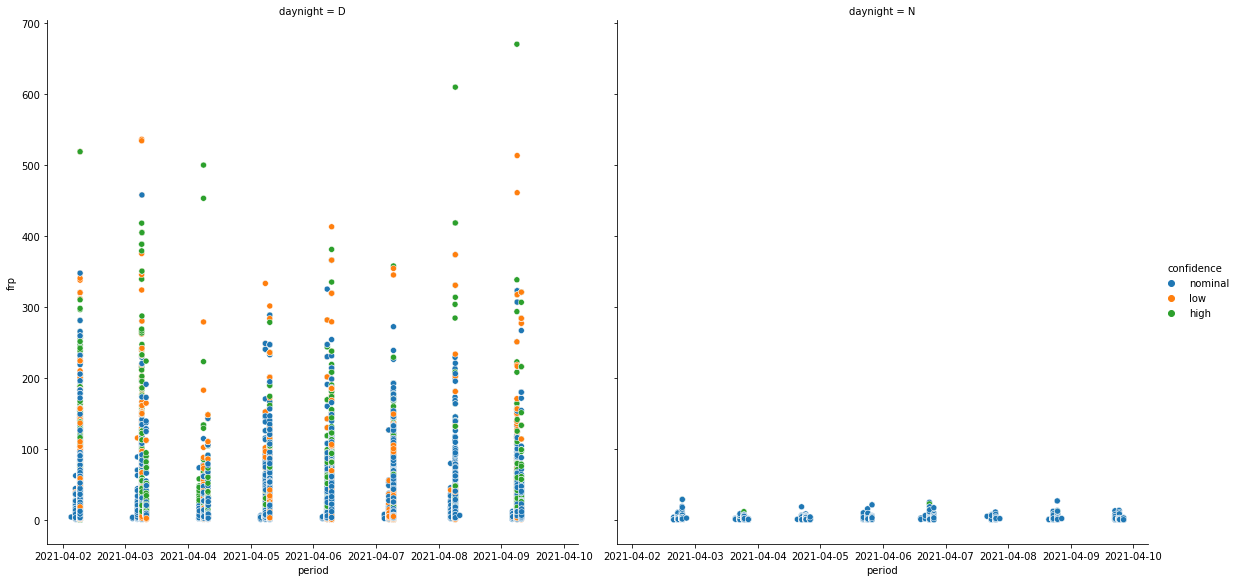

In [ ]:
# FRP/confidence against time
sns.relplot(x="period", y="frp", hue="confidence", col="daynight", data=data, height=8)

We note that there seems to be some data where the gaps between data is small. Hence, this necessitates the merging of time data into hourly frames to better analyze patterns. 

In [ ]:
# Processing data further to clean visualization

# Generate new DFs with times rounded down to the nearest hour
date_sorted = data
date_sorted['period'] = date_sorted['period'].dt.floor('H')
date_sorted_gb = date_sorted.groupby('acq_date') # returns a groupby object which can be called with below code

# [date_sorted.get_group(x) for x in date_sorted_gb.groups] # this displays all the dataframes

date_sorted.head(10)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight,period
0,14.94498,145.64241,349.1,0.39,0.44,2021-04-02,03:12:00,1,nominal,2.0NRT,297.6,4.2,D,2021-04-02 03:00:00
1,14.94896,145.64157,340.8,0.39,0.44,2021-04-02,03:12:00,1,nominal,2.0NRT,296.7,4.2,D,2021-04-02 03:00:00
84,13.16382,120.86255,341.7,0.39,0.44,2021-04-02,04:48:00,1,nominal,2.0NRT,304.3,2.7,D,2021-04-02 04:00:00
83,13.14577,120.82908,347.3,0.39,0.44,2021-04-02,04:48:00,1,nominal,2.0NRT,305.2,3.9,D,2021-04-02 04:00:00
82,13.10709,120.86618,331.8,0.39,0.44,2021-04-02,04:48:00,1,nominal,2.0NRT,305.3,2.3,D,2021-04-02 04:00:00
81,13.38859,122.59747,339.1,0.46,0.39,2021-04-02,04:48:00,1,nominal,2.0NRT,301.2,5.7,D,2021-04-02 04:00:00
80,12.94596,120.78821,338.4,0.39,0.44,2021-04-02,04:48:00,1,nominal,2.0NRT,300.7,2.4,D,2021-04-02 04:00:00
79,12.81664,120.83746,337.7,0.39,0.44,2021-04-02,04:48:00,1,nominal,2.0NRT,305.1,5.4,D,2021-04-02 04:00:00
78,12.80920,121.21590,330.6,0.56,0.43,2021-04-02,04:48:00,1,nominal,2.0NRT,297.6,6.5,D,2021-04-02 04:00:00
77,12.77822,121.17585,333.6,0.56,0.43,2021-04-02,04:48:00,1,nominal,2.0NRT,304.6,7.0,D,2021-04-02 04:00:00


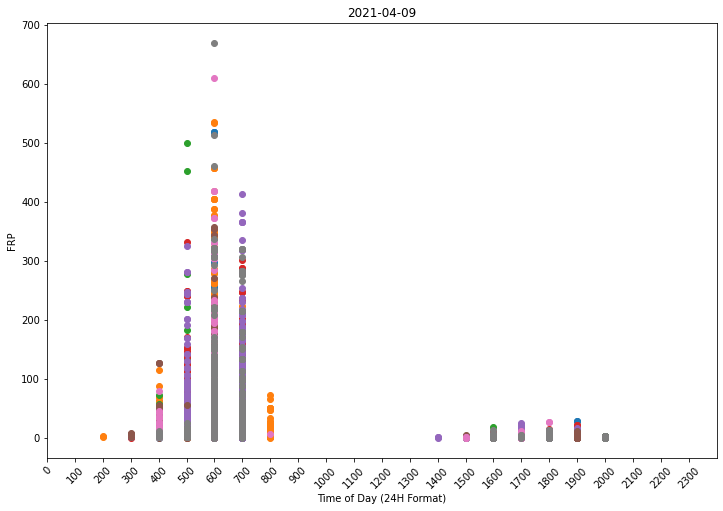

In [ ]:
# Plot individual plots for every date
import numpy as np
pd.options.mode.chained_assignment = None  # ignore warnings
# list_date = date_sorted['acq_date'].unique()

# Formatting of plot
fig = plt.figure(figsize=(12,8))
plt.xlabel('Time of Day (24H Format)')
plt.ylabel('FRP')
plt.xlim(0,2400)
plt.xticks(np.linspace(0,2300,num=24), rotation=45)

for x in date_sorted_gb.groups:
    plt.title(str(x.date()))

    # Data of plot
    current = date_sorted_gb.get_group(x) # iterate through groups
    current['acq_time'] = current['period'].dt.time # extract time
    current['acq_time'] = current['acq_time'].apply(str) # convert to type string
    current['acq_time'] = current['acq_time'].str.replace(':','').astype(int)/100 # convert to 24h format
    plt.scatter(current['acq_time'],current['frp'])
    plt.savefig('content/'+str(x.date())+'.png')

In [ ]:
filenames = date_sorted['acq_date'].dt.date.unique().astype(str)
filenames = [(value+'.png') for value in filenames]

images = []
for filename in filenames:
    images.append(imageio.imread('content/'+filename))
imageio.mimwrite('content/dailyfrp.gif', images, format='gif', duration=1)

for item in images:
    display(Image(data=item))

FileNotFoundError: ignored

Looking at the above visualizations, we can see that: 
- there tends to be a concentration of fire data within the same region
- most fires are detected in the day
- there seems to be a pattern in when the fires are detected within the same 7 day period

We also notice a few points where the data is seemingly in the middle of the ocean.

Consequently, this necessitates cleaning of data to remove unnecessary information. Feature selection is necessary. 

# 4 | Data Pre-Processing

## 4.1 | Cleaning Dataset

In [ ]:
# Convert 'object' columns into appropriate dtype
data['confidence'].astype('category')
data['daynight'].astype('category')

In [ ]:
# Convert time into integers
data['acq_time'] = data['acq_time'].apply(str) # convert to type string
data['acq_time'] = data['acq_time'].str.replace(':','').astype(int)
data.head()

In [ ]:
# Resetting index for OHE preparation
data.set_index('period', inplace=True)
data.reset_index(inplace=True)
data.head()

In [ ]:
# Converting latitude and longitude values to location values

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['longitude'], data['latitude']), crs='EPSG:4326')
result = gpd.sjoin(gdf, world, how='left')
result.head()

ImportError: ignored

In [ ]:
# Remove irrelevant geometric information
result.drop(['geometry','index_right','pop_est','iso_a3','gdp_md_est'],axis=1,inplace=True)
result.head()

In [ ]:
# Check for null values
result.isnull().sum()

In [ ]:
# Above means there are null values present. 
# Solution: remove rows
result.dropna(inplace=True)
result.reset_index(drop=True) # reset index of dataframe to account for missing values
result.isnull().sum()

In [ ]:
# Visualize clean dataset
result.head()

In [ ]:
# # One Hot Encoding
# from sklearn.preprocessing import OneHotEncoder

# enc = OneHotEncoder(handle_unknown='ignore')

# ohe_confidence = pd.DataFrame(enc.fit_transform(data[['confidence']]).toarray())
# ohe_confidence.columns = enc.get_feature_names(['confidence'])
# # ohe_confidence.head()

# ohe_daynight = pd.DataFrame(enc.fit_transform(data[['daynight']]).toarray())
# ohe_daynight.columns = enc.get_feature_names(['daynight'])
# # ohe_daynight.head()

# data = pd.concat([data, ohe_confidence, ohe_daynight], axis=1)
# data.drop(['confidence', 'daynight'], axis=1, inplace=True)
# data.head()

## 4.2 | Feature Selection

In [ ]:
##z-scoring standardization

from sklearn.preprocessing import StandardScaler
def standardize(df):
  # create a scaler object
  std_scaler = StandardScaler()
  std_scaler
  # fit and transform the data
  return pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

X_cleaned = X_bestf = data[['bright_ti4', 'bright_ti5','frp']]
X_cleaned  = standardize(X_cleaned)
print(data[:5])

# 5 | Models - Supervised Learning
In this section, we shall be using our dataset o train two different models to attempt to predict a value of FRP (Fire Radiative Power). The two relevant features that we are using to predict FRP values would be bright_ti4 and bright_ti5. 

In [ ]:
#cleaning
#we can set this data afterwards the features are selected, for now I'll just use ti columns
data_xs = data[['bright_ti4', 'bright_ti5']]
data_y = data[['frp']]

print(data_xs[:5], data_xs.shape)
print(data_y[:5], data_y.shape)

   bright_ti4  bright_ti5
0       349.1       297.6
1       340.8       296.7
2       328.7       283.4
3       339.6       282.8
4       336.9       286.5 (48593, 2)
    frp
0   4.2
1   4.2
2   4.3
3   8.3
4  11.5 (48593, 1)


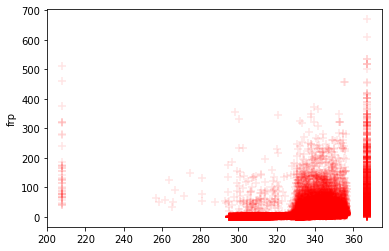

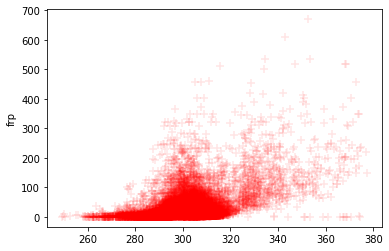

<Figure size 432x288 with 0 Axes>

In [ ]:
#visualization
def scatterplot_XY(x, y):
  plt.scatter(x, y, s=60, c='r', marker='+', alpha = 0.1, label='Class0')
  #plt.xlabel(x.keys())
  plt.ylabel('frp') 
  plt.show()
  plt.clf()


for column in data_xs:
  x= data_xs[column]
  y = data_y
  scatterplot_XY(x, y)

   latitude  longitude  bright_ti4  scan  ...  version bright_ti5  frp  daynight
0  -9.49672  160.28886       341.5  0.39  ...   2.0NRT      297.1  3.8         D
1  -9.46000  159.96707       330.8  0.39  ...   2.0NRT      296.5  2.2         D
2  -3.46820  127.91109       341.8  0.49  ...   2.0NRT      294.1  7.8         D
3  14.95538  121.21060       367.0  0.35  ...   2.0NRT      298.4  6.8         D
4  -3.25473  121.67889       329.4  0.66  ...   2.0NRT      275.3  5.7         D

[5 rows x 13 columns]


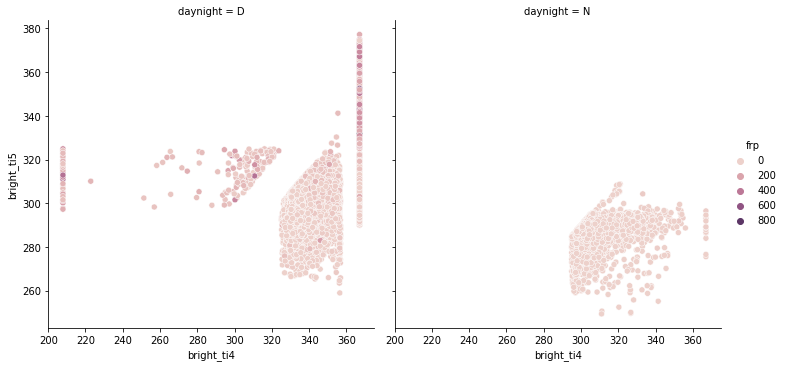

In [ ]:
print(data[:5])
#sns.scatterplot(data = data, x="bright_ti4", y="bright_ti5", size="frp")
sns.relplot(data = data, x="bright_ti4", y="bright_ti5", hue="frp", col ="daynight", kind = "scatter")

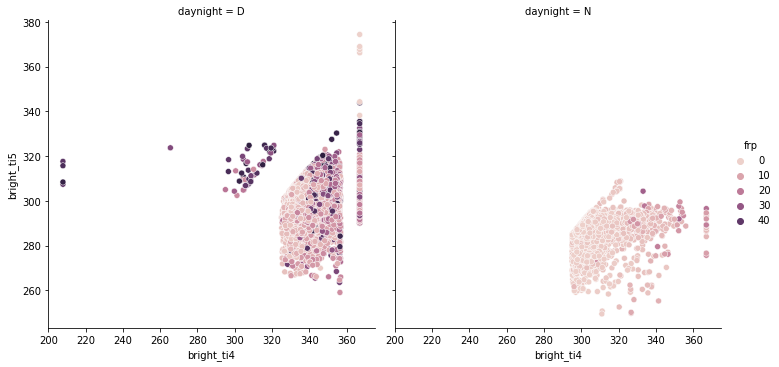

In [ ]:
datafil = data[data.frp < 50]
sns.relplot(data = datafil, x="bright_ti4", y="bright_ti5", hue="frp", col ="daynight", kind = "scatter")

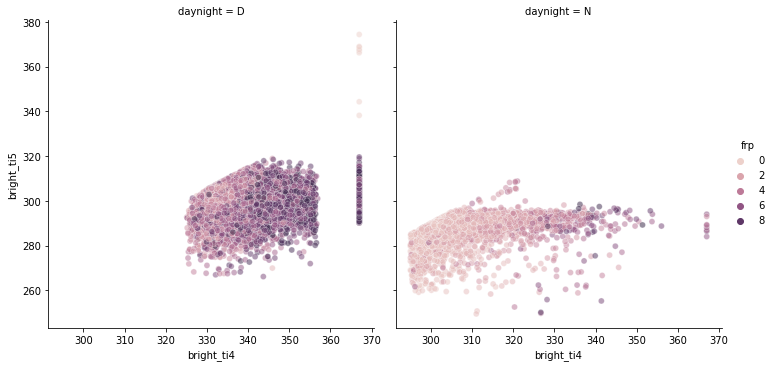

In [ ]:
datafil = data[data.frp < 10]
sns.relplot(data = datafil, x="bright_ti4", y="bright_ti5", hue="frp", col ="daynight", kind = "scatter", alpha = 0.5)

In [ ]:
#since we have too many points, I shall add density to visualize the dense-ness of the points
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def densityscatterplot(x, y):

  # Calculate the point density
  xy = np.vstack([x,y])
  z = gaussian_kde(xy)(xy)

  # Sort the points by density, so that the densest points are plotted last
  idx = z.argsort()
  x, y, z = x[idx], y[idx], z[idx]

  fig, ax = plt.subplots()
  ax.scatter(x, y, c=z, s=50)
  plt.show()

def testdsp():
    # Generate fake data
  x = np.random.normal(size=1000)
  y = x * 3 + np.random.normal(size=1000)

  densityscatterplot(x,y)

(48593,)


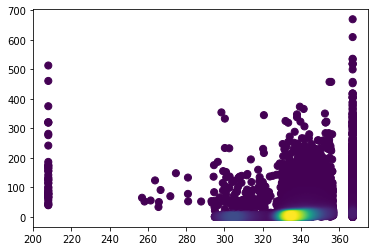

(48593,)


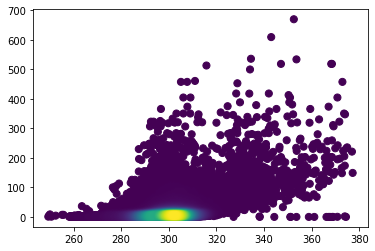

In [ ]:
#DONT RERUN THIS CELL! This cell takes so long to run

for column in data_xs:
  x = data_xs[column].values.reshape(-1,)
  #print(x.shape)
  y = data_y.values.reshape(-1,)

  densityscatterplot(x, y)

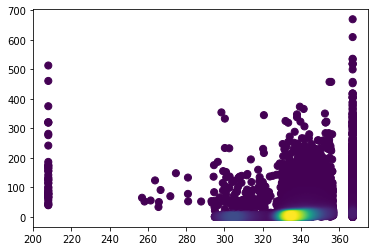

In [ ]:
Image(filename = PATH + "resultsofdensityscatterplot x1-y.png", width=500, height=350)


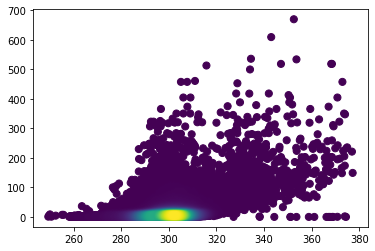

In [ ]:
Image(filename = PATH + "resultsofdensityscatterplot x2-y.png", width=500, height=350)

## Train-Validation-Test Split

In [ ]:
# data for the models here
data_xs = data_xs
data_y = data_y

#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_xs, data_y, test_size=0.2, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(38874, 2) (38874, 1)
(9719, 2) (9719, 1)


In [ ]:
#train-validation Cross Validation with folds
def crossvald(data_xs, data_y):
  ### n_folds = 4

  X_b1, X_b2, y_b1, y_b2 = train_test_split(data_xs, data_y, test_size=0.5, random_state=0)
  X_1, X_2, y_1, y_2 = train_test_split(X_b1, y_b1, test_size=0.5, random_state=0)
  X_3, X_4, y_3, y_4 = train_test_split(X_b2, y_b2, test_size=0.5, random_state=0)

  cross_sets ={1:{'train_X': np.concatenate((X_2,X_3,X_4)),
                  'train_y': np.concatenate((y_2,y_3,y_4)),
                  'val_X': X_1,
                  'val_y': y_1,
                    },
               2:{'train_X': np.concatenate((X_1,X_3,X_4)),
                  'train_y': np.concatenate((y_1,y_3,y_4)),
                  'val_X': X_2,
                  'val_y': y_2,
                    },
               3:{'train_X': np.concatenate((X_2,X_1,X_4)),
                  'train_y': np.concatenate((y_2,y_1,y_4)),
                  'val_X': X_3,
                  'val_y': y_3,
                    },
               4:{'train_X': np.concatenate((X_2,X_3,X_1)),
                  'train_y': np.concatenate((y_2,y_3,y_1)),
                  'val_X': X_4,
                  'val_y': y_4,
                    },
               }

  return cross_sets

test = crossvald(X_train, y_train)

In [ ]:
print(test[1]['train_X'].shape)
print(test[1]['val_X'].shape)

(29156, 2)
(9718, 2)


## 4.1 | Linear Regression Model
Firstly, we shall be attempting to use a linear regression model to predict the continuous FRP values

In [ ]:
from sklearn.linear_model import LinearRegression
 
def linear_reg(X,y):
  reg = LinearRegression().fit(X, y)

  #R^2 value, which is between -1 and 1
  print("Model Loss of R^2:", reg.score(X, y))

  print("Coeffcients [x1,x2] : ", reg.coef_)
  print("Intercept:", reg.intercept_)
  return reg

reg_train = linear_reg(X_train, y_train)

Model Loss of R^2: 0.15844447530673966
Coeffcients [x1,x2] :  [[0.21738353 1.07219739]]
Intercept: [-381.05866524]


In [ ]:
y_pred = reg_train.predict(X_test)

print(y_pred[:5], type(y_pred), y_pred.shape)

df = pd.DataFrame(data=np.concatenate((y_test,y_pred),axis=1), columns=["Actual","Predicted"])

print (df[:5])

def loss_mse(y_pred, y_test):
  n = len(y_pred)
  total = (y_pred-y_test).T.dot(y_pred-y_test)
  loss = 1/n* total
  return loss

loss = loss_mse(y_pred, y_test)
print("Loss Test Set", loss)

y_pred_train = reg_train.predict(X_train)
loss = loss_mse(y_pred_train, y_train)
print("Loss Train set:", loss)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# Calculate mean absolute percentage error (MAPE) modified to account for zeros in the actual readings
mape = 100 * (abs(y_pred-y_test) / ((abs(y_test+y_pred))/2)).values
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

[[ 13.73268379]
 [-10.07328056]
 [ 14.27217236]
 [ -2.35742964]
 [ 16.55808934]] <class 'numpy.ndarray'> (9719, 1)
   Actual  Predicted
0    20.8  13.732684
1     8.1 -10.073281
2    12.3  14.272172
3     0.9  -2.357430
4     1.6  16.558089
Loss Test Set             frp
frp  765.543698
Loss Train set:             frp
frp  760.470651
Mean Absolute Error: 14.139179705534199
Mean Squared Error: 765.5436977754874
Root Mean Squared Error: 27.668460343421486
Accuracy: -106.11 %.


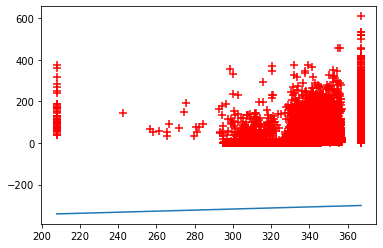

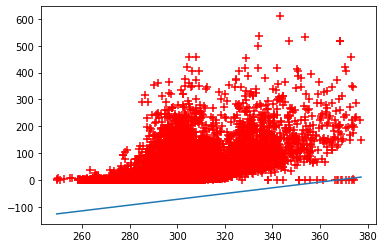

<Figure size 432x288 with 0 Axes>

In [ ]:
#attempt at visualization
def scatterplot_wmodel(x,y,f_pred):
  plt.scatter(x, y, s=60, c='r', marker='+', label='Class0')
  #plt.xlabel(x.keys())
  plt.ylabel('frp') 

  x_pred = np.linspace(min(x),max(x),100)
  y_pred = f_pred(x_pred)
  plt.plot(x_pred, y_pred)
  plt.show()
  plt.clf()

i = 0
for column in data_xs:
  x= data_xs[column]
  y = data_y  
  x_pred = np.linspace(min(x),max(x),100)
  y_pred = reg_train.coef_[0][i]*x_pred + reg_train.intercept_
  plt.plot(x_pred,y_pred) 
  
  plt.scatter(x, y, s=60, c='r', marker='+', label='Class0')
  plt.show() 
  i += 1
  plt.clf()



## Random Forest/Decision Tree
Attempt to use random forest/Decision tree to model the variables

implemented using this: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [ ]:
print(type(y_train))
print(type(X_train))

##convert to numpy to use with randomforest
X_trainn = X_train.values
y_trainn = y_train.values.reshape(-1,)

print(type(y_trainn), y_trainn.shape)
print(type(X_trainn), X_trainn.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'> (38874,)
<class 'numpy.ndarray'> (38874, 2)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_trainn, y_trainn);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test.values)
# Calculate the absolute errors
errors = abs(predictions - y_test.values.reshape(-1,))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


df = pd.DataFrame(data=np.concatenate((y_test,predictions.reshape(-1,1), errors.reshape(-1,1)),axis=1), columns=["Actual","Predicted", "Absolute Error"])

print (df[:5])

Mean Absolute Error: 11.83
   Actual  Predicted  Absolute Error
0    20.8  26.403296        5.603296
1     8.1   6.102325        1.997675
2    12.3  26.372252       14.072252
3     0.9   1.257926        0.357926
4     1.6   7.224657        5.624657


In [ ]:
# Calculate mean absolute percentage error (MAPE) modified to account for zeros in the actual readings
mape = 100 * (errors / ((abs(y_test.values.reshape(-1,))+abs(predictions))/2))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 34.33 %.


In [ ]:
feature_list = X_train.columns

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)


In [ ]:
#run with caution Already generated in folder
# Use dot file to create a graph
# oh no this takes forever to excute - estimated time = 4mins
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file - estimated time >15mins
graph.write_png('tree.png')

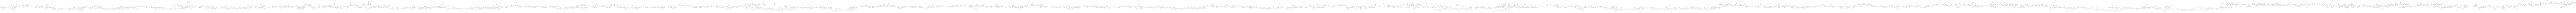

In [ ]:
PATH = "./"
Image(filename = PATH + "tree.png", width=600, height=600)

## Polynomial Model with Cross-Fold Validation
Cross-Fold Validation is used to optimize for the d variable

In [ ]:
y_train.shape

(38874, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
d = 4

def poly_reg(X_train,y_train,d, X_test, y_test):
  poly_reg = PolynomialFeatures(degree=d)
  X_poly = poly_reg.fit_transform(X_train)

  reg = LinearRegression().fit(X_poly, y_train)

  X_poly_t = poly_reg.fit_transform(X_test)
  #R^2 value, which is between -1 and 1
  #print("Training Loss of R^2:", reg.score(X_poly, y_train))
  #print("Test Loss of R^2:", reg.score(X_poly_t, y_test))
  #print("Coeffcients [x1,x2] : ", reg.coef_)
  #print("Intercept:", reg.intercept_)
  return reg, X_poly, abs(reg.score(X_poly_t, y_test))

reg_train, X_poly, test_score = poly_reg(X_train, y_train, 4, X_test, y_test)

#R^2 value, which is between -1 and 1
#print("Model Loss of R^2:", poly_reg.score(X, y))


In [ ]:
splitdata = crossvald(X_train, y_train)


print(test[1]['train_X'].shape)
print(test[1]['val_X'].shape)

len(splitdata)

(29156, 2)
(9718, 2)


4

<function matplotlib.pyplot.show>

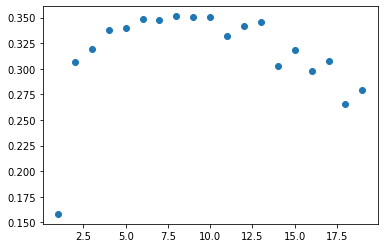

In [ ]:
##selection of ideal d


def bestd (dim, splitdata):
  meanscore = 0
  bestscore = 0
  best_set = None
  best_model = None
  for setno, setdata in splitdata.items():
    #print(setno)
    reg_train, X_poly, test_score = poly_reg(setdata['train_X'], setdata['train_y'], dim, setdata['val_X'], setdata['val_y'])
    meanscore += test_score/len(splitdata)
    if (test_score > bestscore):
      bestscore = test_score
      best_set = setno
      best_model = reg_train

  return meanscore, bestscore, best_model, best_set

yd =[]
for d in range(1,20):

  meanscore, bestscore, best_model, best_set = bestd (d, splitdata)
  yd.append({'meanscore':meanscore, 'bestscore':bestscore, 'best_model': best_model, 'best_set':best_set})



In [ ]:
type(7)

int

    meanscore  ...  best_set
0    0.158223  ...         2
1    0.307096  ...         4
2    0.319751  ...         4
3    0.337514  ...         4
4    0.339843  ...         4
5    0.348977  ...         4
6    0.348019  ...         4
7    0.351333  ...         4
8    0.350467  ...         4
9    0.350851  ...         4
10   0.332318  ...         4
11   0.341894  ...         4
12   0.345844  ...         4
13   0.302835  ...         4
14   0.318054  ...         1
15   0.298084  ...         4
16   0.307938  ...         1
17   0.265520  ...         4
18   0.278985  ...         4

[19 rows x 4 columns]
0.351333211280681 best dimension: 8


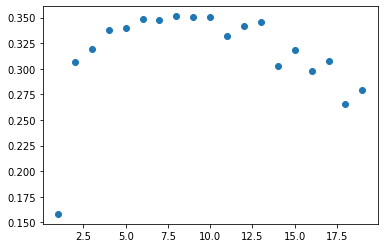

In [ ]:
# this is the plot when we cross validate for the ideal dimension d

ydf = pd.DataFrame(data=yd)
plt.scatter(range(1,20), ydf['meanscore'])
plt.show


best_dim = int(ydf[['meanscore']].idxmax()+1)
best_reg = ydf.at[int(best_dim-1),'best_model']
best_set = ydf.at[int(best_dim-1),'best_model']


print(ydf)
print(max(ydf['meanscore']),'best dimension:', best_dim)

In [ ]:
polyreg = PolynomialFeatures(degree=best_dim)
X_poly_t = polyreg.fit_transform(X_test)
X_poly = polyreg.fit_transform(X_train)
print(X_poly_t.shape)



y_pred = best_reg.predict(X_poly_t)
print("Coeffcients [x1,x2] : ", best_reg.coef_.shape)
print("Intercept:", best_reg.intercept_)


print(y_pred[:5], type(y_pred), y_pred.shape)

df = pd.DataFrame(data=np.concatenate((y_test,y_pred, abs(y_pred-y_test)),axis=1), columns=["Actual","Predicted", "Error"])

print (df[:5])

def loss_mse(y_pred, y_test):
  n = len(y_pred)
  total = (y_pred-y_test).T.dot(y_pred-y_test)
  loss = 1/n* total
  return loss

loss = loss_mse(y_pred, y_test)
print("Loss Test Set", loss)

y_pred_train = best_reg.predict(X_poly)
loss = loss_mse(y_pred_train, y_train)
print("Loss Train set:", loss)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# Calculate mean absolute percentage error (MAPE) modified to account for zeros in the actual readings
mape = 100 * (abs(y_pred-y_test) / ((abs(y_test+y_pred))/2)).values
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

(9719, 45)
Coeffcients [x1,x2] :  (1, 45)
Intercept: [1998.86730417]
[[29.41486198]
 [ 7.90068037]
 [17.27574681]
 [ 0.75807332]
 [ 9.27657424]] <class 'numpy.ndarray'> (9719, 1)
   Actual  Predicted     Error
0    20.8  29.414862  8.614862
1     8.1   7.900680  0.199320
2    12.3  17.275747  4.975747
3     0.9   0.758073  0.141927
4     1.6   9.276574  7.676574
Loss Test Set             frp
frp  568.010175
Loss Train set:             frp
frp  581.565393
Mean Absolute Error: 10.349063552474838
Mean Squared Error: 568.0101747694058
Root Mean Squared Error: 23.832964036590283
Accuracy: 27.47 %.


In [ ]:
#attempt at visualization
def scatterplot_wmodel(x,y,f_pred):
  plt.scatter(x, y, s=60, c='r', marker='+', label='Class0')
  #plt.xlabel(x.keys())
  plt.ylabel('frp') 

  x_pred = np.linspace(min(x),max(x),100)
  y_pred = f_pred(x_pred)
  plt.plot(x_pred, y_pred)
  plt.show()
  plt.clf()

i = 0
for column in data_xs:
  x= data_xs[column]
  y = data_y  
  x_pred = np.linspace(min(x),max(x),100)
  y_pred = reg_train.coef_[0][i]*x_pred + reg_train.intercept_
  plt.plot(x_pred,y_pred) 
  
  plt.scatter(x, y, s=60, c='r', marker='+', label='Class0')
  plt.show() 
  i += 1
  plt.clf()

In [ ]:

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train[:,1], y_train, color='red')

    plt.plot(X_train[0], pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

## 5.2 | Confidence vs Recording Elements

##Neural Network Implementation
Try a neural network I guess here

In [ ]:
#turn frp into categorical data? 
#I honestly have no clue how to do it
#cos neural network is mostly for y is categorical data I feel


# 6 | Models - Unsupervised Learning
K-means clustering to identify hotspots from one day of datapoints

In [ ]:
data[:5]

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight,geometry
0,14.94498,145.64241,349.1,0.39,0.44,2021-04-02,312,1,nominal,2.0NRT,297.6,4.2,D,POINT (145.64241 14.94498)
1,14.94896,145.64157,340.8,0.39,0.44,2021-04-02,312,1,nominal,2.0NRT,296.7,4.2,D,POINT (145.64157 14.94896)
2,-3.69814,141.67618,328.7,0.58,0.70,2021-04-02,448,1,nominal,2.0NRT,283.4,4.3,D,POINT (141.67618 -3.69814)
3,-1.97790,124.42336,339.6,0.39,0.44,2021-04-02,448,1,nominal,2.0NRT,282.8,8.3,D,POINT (124.42336 -1.97790)
4,-1.97842,124.41985,336.9,0.39,0.44,2021-04-02,448,1,nominal,2.0NRT,286.5,11.5,D,POINT (124.41985 -1.97842)


In [ ]:
#cleaning the data, the relevant data is just lat, long and frp, confidence
#need to restructure the data such that it separates out the dates

data_c = data[['latitude', 'longitude', 'frp', 'confidence']].groupby(data['acq_date'])

data_w = list(data_c)[0][1]

In [1]:
fig1 = px.scatter_geo(data_w, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='frp',
                    opacity = (np.log(data_w['frp']+1)/np.log(2)*0.01))
fig1.show()

fig1 = px.scatter_geo(data_w, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='frp',
                    opacity = (data_w['frp']*0.001))
fig1.show()


#for date, daydata in data_c:
##  fig1 = px.scatter_geo(daydata, 
  #                  lat='latitude', 
   #                scope='asia',
    #                center={'lat':2.2180,'lon':115.6628}, # centered to SEA
     #               color='frp',
      #              opacity = 'frp')
 # fig1.show()

NameError: ignored

To conduct clustering, we need to find a suitable algorithm which is fast enough to deal with the number of data points we have.
</p>

In [ ]:
print("Number of data points we have=", data_w.shape[0])

Number of data points we have= 14383


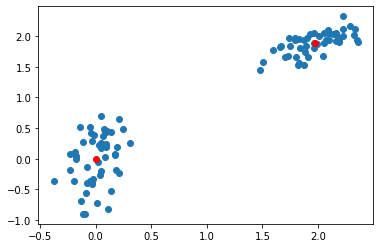

In [ ]:
from scipy.cluster.vq import vq, kmeans, whiten
from numpy import array
import matplotlib.pyplot as plt
features  = array([[ 1.9,2.3],
                   [ 1.5,2.5],
                   [ 0.8,0.6],
                   [ 0.4,1.8],
                   [ 0.1,0.1],
                   [ 0.2,1.8],
                   [ 2.0,0.5],
                   [ 0.3,1.5],
                   [ 1.0,1.0]])
whitened = whiten(features)
book = np.array((whitened[0],whitened[2]))
kmeans(whitened,book)

from numpy import random
random.seed((1000,2000))
codes = 3
kmeans(whitened,codes)

# Create 50 datapoints in two clusters a and b
pts = 50
a = np.random.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)
b = np.random.multivariate_normal([30, 10],
                                  [[10, 2], [2, 1]],
                                  size=pts)
features = np.concatenate((a, b))
# Whiten data
whitened = whiten(features)
# Find 2 clusters in the data
codebook, distortion = kmeans(whitened, 2)
# Plot whitened data and cluster centers in red
plt.scatter(whitened[:, 0], whitened[:, 1])
plt.scatter(codebook[:, 0], codebook[:, 1], c='r')
plt.show()

# 7 | I'm gonna try a different dataset because this dataset is so limited :(


# Trash



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(data_xs, data_y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


##svm doesnt work because its meant for classification
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

(36841, 2) (36841, 1)
(24562, 2) (24562, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



ValueError: ignored